## code playground: 
look here for example code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 


## The Use of Dates is Important

Since we rely upon time series data to help regress two or more variables, store data and diversify the study, manipulating date variables is important. We will store sample data manipulations on dates in these workbooks.

The underlying data is collected several times a minute from the Coinbase marketplace, where raddisco trades. These datun represent the high frequency metaorders (buy, sell) in the AVAX-USD token. Avalanche is a crypto project maintained by Mastercard and the former Cornell professor, Emin Gun Sirer. 

The structure of various files of data are stored with filenames, where dates are present. Traditional, human-read dates are common here. They imply that for a given day, certain variables were stored. There are several experiments: 

CAPS. These files store the volume and value of buy and sell orders, illustrating the flow-of-funds for a day. They typically represent one day or more in the market, and are collected each day, since August 11th, 2022.

MEANSHIFT. These files represent the extent to which the distribution of market value skews, and helps map the degree to which the mean-shift away from a normed market shifts price. 

MATCH. These files represent the current algorithm results, at raddisco. These files store algorithmic choices on the mid point of the AVAX token, and represent how accurately current algorithms recommend trades. 

In [2]:
#convert the us indicator date to the filename type, using
#https://pynative.com/python-datetime-format-strftime/#:~:text=Below%20are%20the%20character%20codes%20to%20format%20the,of%20the%20weekday.%20Like%2C%20Monday%2C%20Tuesday%20More%20items
def convertxy():
    from dateutil import parser
    dt = parser.parse("Dec 21 2020  1:01PM")
    print(type(dt), dt)

In [3]:
#take string, Wednesday, August 17, 2022
#strip first three characters from first word to match file name by day
#strip first three characters from second word, to arrive at comparable

In [3]:
print(convertxy())

<class 'datetime.datetime'> 2020-12-21 13:01:00
None


## how to access the limit order book files
Supplying the name of the file will unlock the day's worth of data (MEANSHIFT, CAPS or MATCH). 

In [4]:
# Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-MEANSHIFT.csv
x = pd.read_csv("lob_caps/Sat Sep 24 2022 11:10:07 GMT-0700 (Pacific Daylight Time)-MEANSHIFT.csv")
x.dtypes


mp           float64
timeStamp      int64
mean         float64
skew         float64
dtype: object

## Economic Indicators Shape Market Activity

here are the contents of the economic indicator announcement file. I typically refer to this variable set as Ia, or the announcment of an indicator. It implies an event, where a critical national economic statistic is announced. Markets tend to move before and after these events. 

For the sake of the study, one can imply that there exist two structures per Ia: the pre announcement buildup of metaorders (buy/sell), and the post announcement activity. This implies a buy up or sell off pre or post the event. A quadratic typology of pre and post market structures are likely mappable; we can study both the capitalization of sell (ask) and buy (bid) activity, the value of these orders, and the clumps of these orders. 

The indicator serves as a tool to help stimulate volatility, introduce causal features into the scenario, and create variations in price with clear cause. 

Later  in the study we will study each capitalization period, by day, then look for the corresponding Ia, in that day, if any. 

In [4]:
def getIndicators():
    return pd.read_csv("usIndicatorsFall22-fulls.csv")

In [5]:
print(getIndicators())
print(type(getIndicators()), getIndicators().shape[0])

                             date      time                         indicator  \
0          Monday, August 1, 2022   6:00 AM             ism manufacturing pmi   
1         Tuesday, August 2, 2022   6:00 AM                jolts job openings   
2       Wednesday, August 3, 2022   6:00 AM         ism non manufacturing pmi   
3        Thursday, August 4, 2022   4:30 AM                  balance of trade   
4          Friday, August 5, 2022   4:30 AM                 non farm payrolls   
5      Wednesday, August 10, 2022   4:30 AM               core inflation rate   
6      Wednesday, August 10, 2022   4:30 AM                inflation rate yoy   
7       Thursday, August 11, 2022   4:30 AM                           ppi mom   
8         Friday, August 12, 2022   6:00 AM  michigan consumer sentiment pref   
9        Tuesday, August 16, 2022   4:30 AM                  building permits   
10     Wednesday, August 17, 2022   4:30 AM                  retail sales mom   
11     Wednesday, August 17,

In [7]:
ind = pd.read_csv("usIndicatorsFall22-fulls.csv")
t = ['date', 'time']
ind[t].dtypes

date    object
time    object
dtype: object

## Which economic indicators fall within the data set?
Currently, the following annouced indicators are studied. They are chosen due to their critical importance and understood impact on public markets. 

If you combine the factors from the getIndicators() function above, you could study the trend of the forecast indicator, in conjunction with the capitalization rates in markets. There is of course, a spread between forecast, consensus and actual values within the indicator, which form its own trend. 

The data set allows for each major indicator to be observed through several months, as it is forecast and announced. Given that each indicator possesses a life of its own, they illustrate the US's economic activity through two quarters, and how that public pessimism (or lack thereof) is reflected in the cryptocurrency metaorder set. 

Other financial products can be studied within this perspective. If you took the annoucement trend alongside a galaxy of equities, for example, the price trend could be studied, alongside permutations in the indicator, or a set. 

The study also encourages a multivariate study. The combination of factors is completely available, as scenarios in employment, ISM and inflation become visbile. 

In [8]:
ind['indicator'].unique()

array(['ism manufacturing pmi', 'jolts job openings',
       'ism non manufacturing pmi', 'balance of trade',
       'non farm payrolls', 'core inflation rate', 'inflation rate yoy',
       'ppi mom', 'michigan consumer sentiment pref', 'building permits',
       'retail sales mom', 'fomc minutes', 'durable goods orders mom',
       'personal income mom', 'personal spending mom',
       'fed chair powell speech', 'fomc economic projections',
       'fed press conference', 'core inflation rate yoy',
       'buildling permits', 'Non Farm Payrolls'], dtype=object)

## gather all the LOB data files per announcement

Since the coup de grace involes pinnning down the indicator with the market's metaorders, integrating the indicators with capitalization is key. Below various data-prep steps are taken to combine the day of the Ia with the corresponding market order flow. 

concatenating folder path to filename:

In [9]:
def loadCSV(type, fileName):
    if type == "caps":
        sl = "./lob_caps/"
        loc= sl+ fileName #+ "-CAPS.csv"
    df = pd.read_csv(loc)
    return df

get limit order book for a date string

In [10]:
def getlob(csv):
        print("GETTING LOB FILE FOR: csv named ",csv)
        csv = "lob_caps/" + csv
        df = pd.read_csv(csv)
            # print("\tfor ", type, df.columns)
        return df

## get CAPS for indicator date
Searches for filenames of a certain date. Returns a dataframe from the dated file, with the elaborated date data. This example searches and retrieves a CAPS file.  

In [12]:
import os

def getCAPSByDateAndType(date, type, edt ):  #returns a dict, date + df caps for that date, then extended date and time
                                # print("for type, ", type)
    for root, dirs, files in os.walk("."):
        for filename in files:
            if date in filename :
                if type in filename:
                    print("GET CAPS FOR: ", date  , " : ", filename)
                                 # print("returning, ", filename )
                    obj = {"date":date, "df":getlob(filename), "time":edt}
                                # print("getting caps from  ", filename ,obj)
                    return obj
    

# primary study entry point
Iterates indicator file, returns data frame per indicator announcement, based on the type of data you wish. Supply argument "CAPS" to get capitalization data. 

will grab the indicator first, then grab the capitalization data on the day of that indicator

In [13]:
def iterateByType(type):
    # print("for type, ", type)
    data = getIndicators() #indicators file read, access all indicator data per event/announcement
    result = []
    for row, val in data.iterrows():
        s1 = val['date'].replace(','  , '')
        ss = s1.split(" ")
        day  = ss[0][0:3]
        mon = ss[1][0:3]
        num = ss[2]
        hr = val['time']
        if int(num) <10:
            num = "0"+num
        yr = ss[3]
        l = day + " " + mon + " " + num #+ " " + hr
        extendedDateTime = day + " " + mon + " " + num + " " + hr + " " +yr
        print("FOR INDICATOR, DATED: ",extendedDateTime)
        result.append(getCAPSByDateAndType(l, type, extendedDateTime)) #returns df/caps and the date associated    
    return result

## study one: how does the announcement impact the accumulation of the commodity?

one direction to take is a regression analysis of types of orders (buy or sell) with the resulting price. Does buy order flow impact the price of something more than the sell activity?

In [14]:
def studyCorrelations(cArr):
    print(len(cArr))

    for i in range(len(cArr)):
        print(cArr[i]["date"], "CAPS data: ")
        print(cArr[i]["corrDf"])

help the announcement file coordinate with the .csv of CAPS, etc

In [15]:
def convertMo(month):
    if month =="Aug":
        return "08"
    if month == "Sep":
        return "09"
    if month == "Oct":
        return "10"
    if month == "Nov":
        return "11"

express the csv file's day as an epoch, an integer value representing the milliseconds since 1970. This epoch format is used inside the CAPS file and others to capture the second when capitalizations took place. The epoch is a cheap way to store time series as a single integer. 

However, the date of the csv (in the filename) must be translated into an epoch in order to correctly sync with a day of capitalizatoin data. A better study would be to make all dates in one format, but advantages exist for epochs, as they can do very simply and fast arithmetic, though they lack readability by people. 

In [16]:
from dateutil import parser
import datetime
import time

def convertIndicatorDateToEpoch(original):
    # print("original ", original) #Thu Aug 11 4:30 AM 2022
    re =time.strptime(original, "%a %b %d %I:%M %p %Y")
    ep = time.mktime(re)
    # print("TS ", int(ep))   #1660311116579
    return int(ep)

### joining announcement data and capitalization data
a key integration step, which we'll use often

in early iterations of this step, the array of announcements was used to locate proper day data. In the future, the opposite will take place, to study patterns across many days. We will likely iterate all capitalizations, then for each day of fund flows, look for a possible announcement, and study the markets on announcement days. 

This branches the study into two directions: 
* forms a correlation matrix between order types, order volumes, values and pricing [hot study, needs to be done!]
* a visualization workbench for capitalization, which to date only exists for buy orders and mid point price. 

no pressure or anytyhing, but simply doing any one of the above studies will likely satisfy the M1 deliverable. What if we knew which variable had the greatest association with price? Its UNKNOWN heretofore, and is worth a great deal to the hedge fund industry [CAPTAIN JACK TREASURE CHEST]

In [17]:
import time
from time import gmtime, strptime
def demarcateByAnnounceTime():
    obj = iterateByType("CAPS")
    # print(obj)#  , obj["df"])
    corrArray = []
    # visualizeAnnoucementBuild = []
    for i in range(len(obj)):
        if obj[i] is not None:
            # print(obj[i]["df"]["mp"].head(2))
            # print(type(obj[i]["df"].corr()))
            l = obj[i]["df"].corr()
            date = obj[i]["time"]
            indEpoch = convertIndicatorDateToEpoch(date)#.split(" ") # turn this to epoch Mon Aug 01 6:00 AM
            buildDict = {"date":date , "indicatorAnnouncementEpoch":indEpoch}
            # visualizeAnnoucementBuild.append(buildDict) #date of announcement and its epoch value
            dict = {"corrDf": l, "date":date }
            corrArray.append(dict)
    # visualizeAnnoucementBuilds(visualizeAnnoucementBuild)
    studyCorrelations(corrArray)

In [18]:
demarcateByAnnounceTime()

FOR INDICATOR, DATED:  Mon Aug 01 6:00 AM 2022
FOR INDICATOR, DATED:  Tue Aug 02 6:00 AM 2022
FOR INDICATOR, DATED:  Wed Aug 03 6:00 AM 2022
FOR INDICATOR, DATED:  Thu Aug 04 4:30 AM 2022
FOR INDICATOR, DATED:  Fri Aug 05 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Thu Aug 11 4:30 AM 2022
GET CAPS FOR:  Thu Aug 11  :  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Fri Aug 12 6:00 AM 2022
GET CAPS FOR:  Fri Aug 12  :  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Tue Aug 16 4:30 AM 2022
GET CAPS FOR:  Tue Aug 16  :  Tue Aug 16 2022 05:46:44 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Tue Au

**Iterate Indicator dataframe by index**

provide an index location in the indicator dataframe, and get back the indicator, with information

retrieve all csv data per row in indicators

In [ ]:
#read into ind df, get time of the release, use date to retrieve a file name, using ls array, find day string in that array, use result to grab a file

## Code Graveyard

In [13]:
# import os

# def getFilesByDateOf(d ):
#     for root, dirs, files in os.walk("."):
#         for s1 in files:
#             if d in s1 :
#                 # print("match ", d, " : ", s1)
#                 m = "MEANSHIFT"
#                 c = "CAPS"
#                 mt = "MATCH"
#                 if m in s1:
#                     getlob(m, s1)
#                 elif c in s1:
#                     getlob(c, s1)
#                 elif mt in s1:
#                     getlob(mt, s1)
#     return 0

In [14]:
# # from dateutil import parser

# def convertIndicatorDateToEpoch(original):
#     print("orig: ", original) #Thu Aug 11 4:30 AM
#     #date, time: "Monday, August 1, 2022",6:00 AM
#     newstring = original.split(" ") #must format from  Thu Aug 11 4:30 AM --to-- Thu  08 11 2022 4:30 AM
#     month = convertMo(newstring[1])
#     e = newstring[1] + " " + month + " " + newstring[2] + " " + "2022" + " " + newstring[3] + " " + newstring[4]
#     print("CTE ", original," ==> ", e)
#     # dt = parser.parse(e)
#     dt2 = parser.parse(e)
#     print(e , " ----- ", dt2, "\n\n")
#     return dt2

In [ ]:
# # !ls lob_caps/
# f = loadCSV("caps", 'Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv')
# f.head()

### iterating economic announcements
you can supply an index value to look up an announcement's day data

In [19]:
def iterateIndforIndex(index):
    frame = ind.loc[index]
    
    return frame

t = iterateIndforIndex(0)
t.head()

date         Monday, August 1, 2022
time                        6:00 AM
indicator     ism manufacturing pmi
actual                         52.8
previous                       53.0
Name: 0, dtype: object

## get time between
between start or given start, and limit, as defined by announcement time
1. first output, from .loc[0] to time of announcement, then
2. from announcement as .loc[0] to end of file

to demonstrate the order build, then the impact of the announcement, so we use the announcement as a pillar to the study, running orders up to it, taking that corr, then studying the order profile after, as corr

In [ ]:
# from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html

In [16]:
# for row, val in ind.iterrows():
#     s1 = val['date'].replace(','  , '')
#     ss = s1.split(" ")
#     day  = ss[0][0:3]
#     mon = ss[1][0:3]
#     num = ss[2]
#     if int(num) <10:
#         num = "0"+num
#     yr = ss[3]
#     l = day + " " + mon + " " + num
#     print(l, " ", val['indicator'])
    # res = getFilesByDateOf(l)

## visualization workbench: associating a key variable versus midpoint price
TODO: for every day of capitalization, locate whether an Ia happened that day. What was the impact before and after the Ia? 
* YET ANOTHER CAPTAIN JACK PROBLEM TO SOLVE
* for each day of capitalization (CAPS file), look for an announcement. Take the epoch value of the announcement date, and plug it in as an axvline, in the final 3 lines of the following script, this will demarcate the pre and post capitalization events, pertaining to an Ia. 
* the below code will help us to EDA the metaorder activity typical to the time before an Ia, then after

FOR INDICATOR, DATED:  Mon Aug 01 6:00 AM 2022
FOR INDICATOR, DATED:  Tue Aug 02 6:00 AM 2022
FOR INDICATOR, DATED:  Wed Aug 03 6:00 AM 2022
FOR INDICATOR, DATED:  Thu Aug 04 4:30 AM 2022
FOR INDICATOR, DATED:  Fri Aug 05 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Wed Aug 10 4:30 AM 2022
FOR INDICATOR, DATED:  Thu Aug 11 4:30 AM 2022
GET CAPS FOR:  Thu Aug 11  :  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Thu Aug 11 2022 05:39:53 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Fri Aug 12 6:00 AM 2022
GET CAPS FOR:  Fri Aug 12  :  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Fri Aug 12 2022 06:31:51 GMT-0700 (Pacific Daylight Time)-CAPS.csv
FOR INDICATOR, DATED:  Tue Aug 16 4:30 AM 2022
GET CAPS FOR:  Tue Aug 16  :  Tue Aug 16 2022 05:46:44 GMT-0700 (Pacific Daylight Time)-CAPS.csv
GETTING LOB FILE FOR: csv named  Tue Au

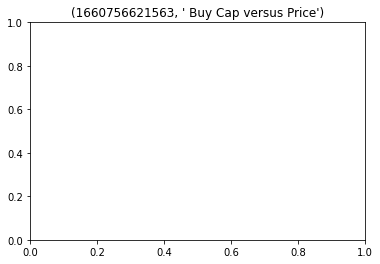

start time:  1660756621563
end time:  1660842042460
date of data:  Wed Aug 17 

Announcement time:  1661340600


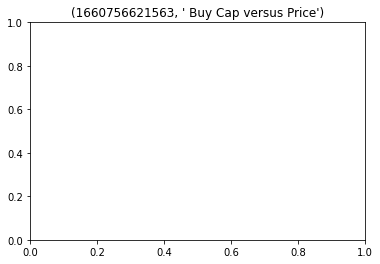

start time:  1661355849950
end time:  1661448267706
date of data:  Wed Aug 24 

Announcement time:  1661513400


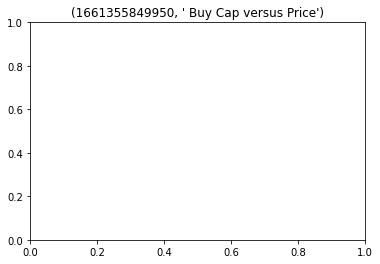

start time:  1661520441572
end time:  1661635166818
date of data:  Fri Aug 26 

Announcement time:  1661513400


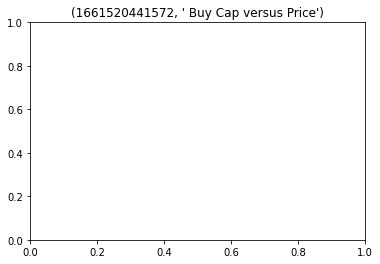

start time:  1661520441572
end time:  1661635166818
date of data:  Fri Aug 26 

Announcement time:  1661518800


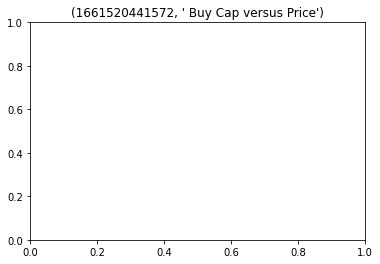

start time:  1661520441572
end time:  1661635166818
date of data:  Fri Aug 26 



TypeError: 'NoneType' object is not subscriptable

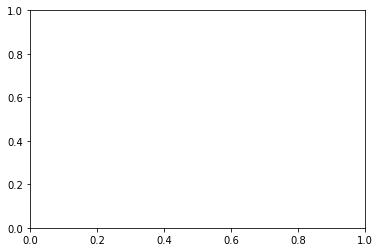

In [21]:
import datetime
def demarcateByAnnounceTime():
    dfArray = iterateByType("CAPS")
    # print("CAPS array: \n",len(dfArray))
    #now iterate the array, and per caps result, draw a chart with a line and the caps series(53)
    for i in range(len(dfArray)):
        if i > 9:
            if isinstance(dfArray[i], dict):
                # print(i, "iterated 1, ",  dfArray[i], "iterated 2, ", type(dfArray[i])) #every item is a dict
                
                print("start time: ", dfArray[i]["df"]["time"].min())
                print("end time: ", dfArray[i]["df"]["time"].max())
                print("date of data: ", dfArray[i]["date"], "\n")
                
                data1 = dfArray[i]["df"]['mp']
                data2 = dfArray[i]["df"]['bc']
                t= dfArray[i]["df"]['time']
                ai = dfArray[i]["time"]
                fig, ax1 = plt.subplots()
                tt = i + 1
                if isinstance(dfArray[tt]["time"], str):
                    indEpoch = convertIndicatorDateToEpoch(dfArray[tt]["time"])#.split(" ") # turn this to epoch Mon Aug 01 6:00 AM
                    print("Announcement time: ",indEpoch)
                color = 'tab:red'
                ax1.set_xlabel('time (s)')
                ax1.set_ylabel('price, AVAX', color=color)
                ax1.plot(t, data1, color=color)
                ax1.tick_params(axis='y', labelcolor=color)

                ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

                color = 'tab:blue'
                ax2.set_ylabel('buy capitalization', color=color)  # we already handled the x-label with ax1
                ax2.plot(t, data2, color=color)
                ax2.tick_params(axis='y', labelcolor=color)

                fig.tight_layout()  # otherwise the right y-label is slightly clipped
                e = dfArray[i]["df"]['time'].loc[0]   #datetime.datetime.fromtimestamp(
                comb = e ," Buy Cap versus Price" #.strftime('%m-%d')
                plt.close()
                plt.title(comb)
                #add vertical line at x=4
                # if indEpoch:
                #     plt.axvline(x=indEpoch, color='black', linestyle='-')
                plt.show()
            
        
        
        
demarcateByAnnounceTime()